In [1]:
using Plots
using LinearAlgebra
using DifferentialEquations
using MatrixDepot
using Revise

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1273


include group.jl for user defined matrix generators
verify download of index files...
used remote site is https://sparse.tamu.edu/?per_page=All
populating internal database...


# Heat Conduction

In [2]:
using HeatSolver

┌ Info: Precompiling HeatSolver [2973716a-e7fd-4298-be25-ac2997446d52]
└ @ Base loading.jl:1273


include group.jl for user defined matrix generators
verify download of index files...
used remote site is https://sparse.tamu.edu/?per_page=All
populating internal database...


## 1D steady-state heat conduction on a finite bar

In [3]:
bar_sln = bar1D_steady(1, 1, 5, 100, 0, HeatSolver.FinDiff);

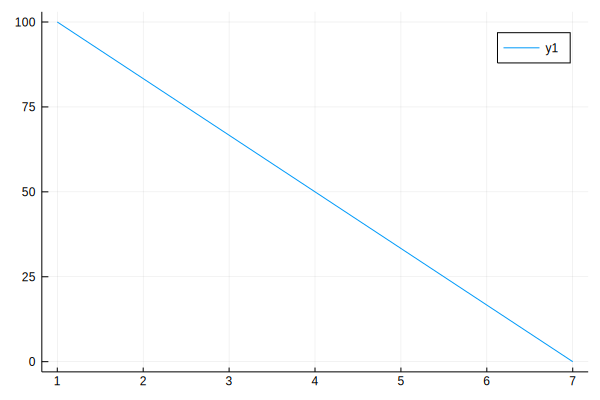

In [4]:
plot(bar_sln)

## 1D time-varying heat equation on a finite bar

## 1D time-varying heat equation on a finite bar: exponential inital distribution - coarse solution
Here, I attempt to reproduce the [MATLAB example authored by Qiqi Wang](https://www.youtube.com/watch?v=rSOmdsyEBTE), that is part of [MIT 2.097/6.339/16.920 : Num Methods for Part Diff Eq, Fall 2017](https://learning-modules.mit.edu/materials/index.html?uuid=/course/16/fa17/16.920#materials). I have turned his example into a MATLAB [script in my heat-transport-experiments repository](https://gitlab.com/n8xm/heat-transport-experiments/tree/master/mit_matlab_demo).
  * Assumes Dirichlet BC $u(0) = u(1) = 0$

In [5]:
L = 1
#N = 9
N = 999 # number of interior points
domain = LinRange(0, L, N+2) # domain includes endpoints
domain_interior = domain[2:N+1]

α = 0.01 # thermal diffusivity (m^2/s)
t_0 = 0.0 
t_final = 1.0
f_0 = λ -> exp(-(λ - 0.5).^2 / 0.1^2)

u_0 = f_0.(domain_interior); # we don't feed the endpoints to the solver

In [6]:
A = heat_operator(α, L, N);

In [7]:
# solver assumes that field value at endpoints is 0
u_T = bar1D(A, L, N, u_0, t_0, t_final, HeatSolver.FinDiff);

In [8]:
size(u_T)

(999, 11393)

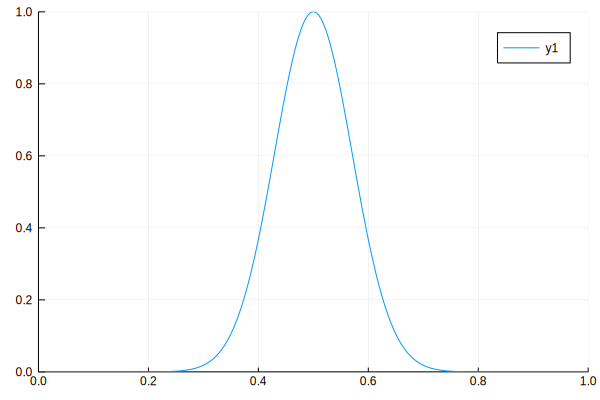

In [9]:
plot(domain_interior, u_T[1], xlims = (0,1),ylims = (0,1))

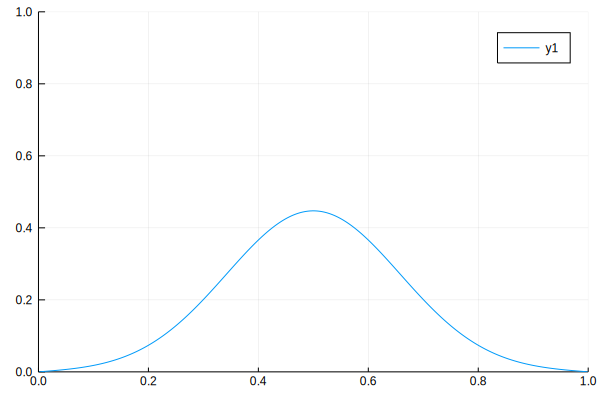

In [10]:
plot(domain_interior, u_T[end], xlims = (0,1),ylims = (0,1))

┌ Info: Saved animation to 
│   fn = /home/nathan/Code/heat-transport-experiments/interactive_notebooks/tmp.gif
└ @ Plots /home/nathan/.julia/packages/Plots/XpHkc/src/animation.jl:98


Plots.AnimatedGif("/home/nathan/Code/heat-transport-experiments/interactive_notebooks/tmp.gif")
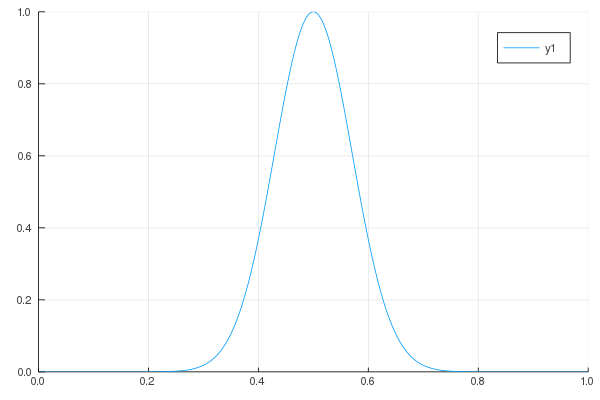

In [11]:
@gif for i=1:size(u_T,2)
    plot(domain_interior, u_T[i], xlims = (0,1),ylims = (0,1))
end every 300

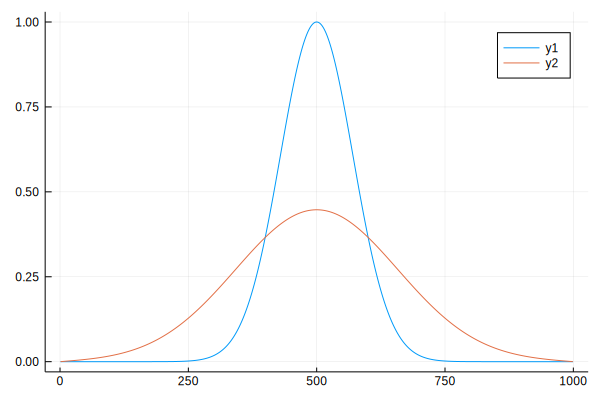

In [12]:
plot(u_T[1])
plot!(u_T[end])

## 1D time-varying heat equation on a finite bar
Assumes Dirichlet BC $u(0) = u(1) = 0$

### Solution with $L=1$, $\alpha=0.05$

In [13]:
α = 0.05 # thermal diffusivity (m^2/s)
t_0 = 0.0 
t_final = 1.0
f_0 = λ -> sin(2π*λ) 
L = 1
N = 100 # number of interior points
domain = LinRange(0, L, N+2) # domain includes endpoints
domain_interior = domain[2:N+1]
u_0 = f_0.(domain_interior); # we don't feed the endpoints to the solver

In [14]:
# solver assumes that field value at endpoints is 0
u_T = bar1D(α, L, N, u_0, t_0, t_final, HeatSolver.FinDiff);

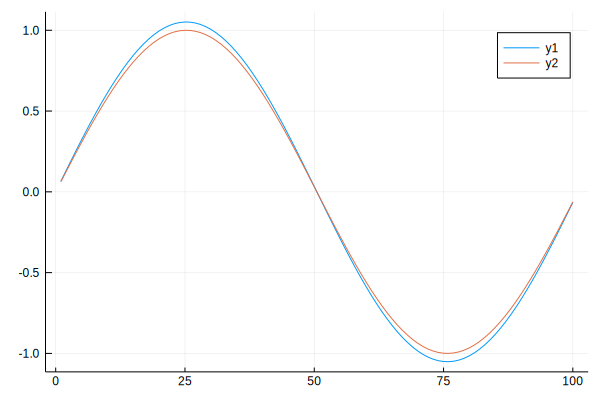

In [15]:
plot(u_T[end])
plot!(u_0)

In [16]:
h = L/(N+1)

0.009900990099009901

In [17]:
domain[2] - domain[1] # should match the value of h, above

0.009900990099009901

In [18]:
A = (1.0/h^2)*matrixdepot("tridiag",N);

In [19]:
cond(Matrix(matrixdepot("tridiag",N)))

4133.64292680158

In [20]:
cond(Matrix(A))

4133.642926801247

In [21]:
A_inv = inv(A);

From Handout 2 of CS6220, the sum of the elements of any row of $A^{-1}$ should be greater than or equal to 0, and less than or equal to $\frac{1}{8}$

In [22]:
maximum([sum(A_inv[i,:]) for i in 1:N])

0.12498774629938275

In [23]:
minimum([sum(A_inv[i,:]) for i in 1:N])

0.004901480247034614

The peak magnitude of the second derivative of the intial distribution $u_0$ should be $4\pi^2$, assuming that $u_0 = \sin(2\pi x)$ and applying the chain rule.

In [24]:
maximum(-A*u_0)

39.46091442884972

In [25]:
4*pi^2

39.47841760435743

### Solution with $L=2\pi$, $\alpha=1$

In [26]:
α = 1.0 # thermal diffusivity (m^2/s)
t_0 = 0.0 
t_final = 1.0
f_0 = λ -> sin(λ) 
L = 2π
N = 100 # number of interior points
domain = LinRange(0, L, N+2) # domain includes endpoints
domain_interior = domain[2:N+1]
u_0 = f_0.(domain_interior); # we don't feed the endpoints to the solver

In [28]:
A = heat_operator(α, L, N);

# solver assumes that field value at endpoints is 0
u_T = bar1D(A, L, N, u_0, t_0, t_final, HeatSolver.FinDiff);

In [29]:
A

100×100 Tridiagonal{Float64,Array{Float64,1}}:
 -516.789   258.394      ⋅         ⋅     …      ⋅         ⋅         ⋅   
  258.394  -516.789   258.394      ⋅            ⋅         ⋅         ⋅   
     ⋅      258.394  -516.789   258.394         ⋅         ⋅         ⋅   
     ⋅         ⋅      258.394  -516.789         ⋅         ⋅         ⋅   
     ⋅         ⋅         ⋅      258.394         ⋅         ⋅         ⋅   
     ⋅         ⋅         ⋅         ⋅     …      ⋅         ⋅         ⋅   
     ⋅         ⋅         ⋅         ⋅            ⋅         ⋅         ⋅   
     ⋅         ⋅         ⋅         ⋅            ⋅         ⋅         ⋅   
     ⋅         ⋅         ⋅         ⋅            ⋅         ⋅         ⋅   
     ⋅         ⋅         ⋅         ⋅            ⋅         ⋅         ⋅   
     ⋅         ⋅         ⋅         ⋅     …      ⋅         ⋅         ⋅   
     ⋅         ⋅         ⋅         ⋅            ⋅         ⋅         ⋅   
     ⋅         ⋅         ⋅         ⋅            ⋅         ⋅         ⋅   
    

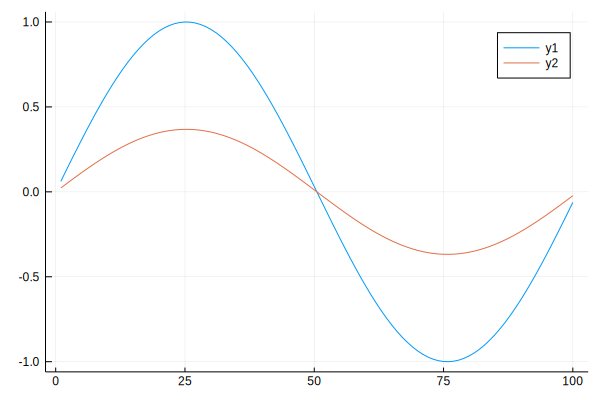

In [30]:
plot(u_0)
plot!(u_T[end])

## 1D time-varying heat equation around circle (periodic BCs)

Using my own Julia module, [HeatSolver.jl](https://gitlab.com/n8xm/heatsolver.jl). (See also [HeatPlots.jl](https://gitlab.com/n8xm/HeatPlots.jl).)

### Finite Difference Solution

In [45]:
using MatrixDepot

In [46]:
t_0 = 0.0 
t_final = 1.0
f_0 = λ -> sin(λ) 
L = 2π
N = 1000 # number of interior points
domain = LinRange(0, L, N) # domain includes endpoints
u_0 = f_0.(domain);

In [47]:
h = L/(N+1)

0.0062769083987808056

In [48]:
tridiag = matrixdepot("tridiag",N)
A_unscaled = Matrix(tridiag)
A_unscaled[1,N] = -1 # to enforce periodic BC 
A_unscaled[N,1] = -1 # to enforce periodic BC
A_unscaled

1000×1000 Array{Float64,2}:
  2.0  -1.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0  -1.0
 -1.0   2.0  -1.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0  -1.0   2.0  -1.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0  -1.0   2.0  -1.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0  -1.0   2.0  -1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0  -1.0   2.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0  -1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0

In [49]:
α = 1.0 # thermal diffusivity (m^2/s)
A = -α*(1.0/h^2)*A_unscaled

1000×1000 Array{Float64,2}:
 -50762.0   25381.0      -0.0      -0.0  …      -0.0      -0.0   25381.0
  25381.0  -50762.0   25381.0      -0.0         -0.0      -0.0      -0.0
     -0.0   25381.0  -50762.0   25381.0         -0.0      -0.0      -0.0
     -0.0      -0.0   25381.0  -50762.0         -0.0      -0.0      -0.0
     -0.0      -0.0      -0.0   25381.0         -0.0      -0.0      -0.0
     -0.0      -0.0      -0.0      -0.0  …      -0.0      -0.0      -0.0
     -0.0      -0.0      -0.0      -0.0         -0.0      -0.0      -0.0
     -0.0      -0.0      -0.0      -0.0         -0.0      -0.0      -0.0
     -0.0      -0.0      -0.0      -0.0         -0.0      -0.0      -0.0
     -0.0      -0.0      -0.0      -0.0         -0.0      -0.0      -0.0
     -0.0      -0.0      -0.0      -0.0  …      -0.0      -0.0      -0.0
     -0.0      -0.0      -0.0      -0.0         -0.0      -0.0      -0.0
     -0.0      -0.0      -0.0      -0.0         -0.0      -0.0      -0.0
      ⋮                

In [50]:
u_T = bar1D(A, L, N, u_0, t_0, t_final, HeatSolver.FinDiff);

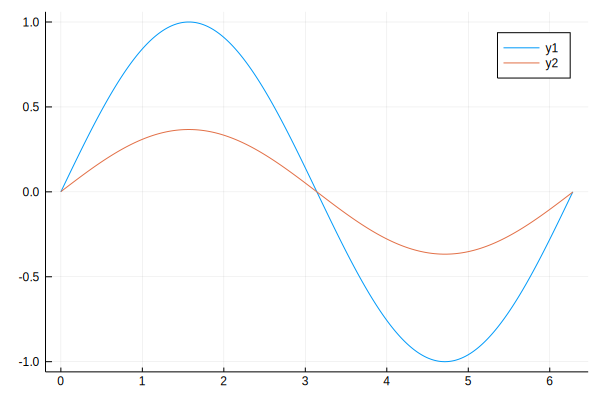

In [51]:
plot(domain, u_0)
plot!(domain, u_T[end])

In [52]:
u_T

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 28952-element Array{Float64,1}:
 0.0                   
 2.2621761031683305e-5 
 3.285126996432618e-5  
 5.537301526561693e-5  
 7.443087738644386e-5  
 0.00010516201655825464
 0.00013949207436880271
 0.00018439356498514036
 0.00023221256987735503
 0.00027531709858643765
 0.00031256932470321083
 0.0003461916406454962 
 0.00037861501473214823
 ⋮                     
 0.9996275097288166    
 0.9996620517134284    
 0.9996965936966675    
 0.9997311356831093    
 0.9997656776681786    
 0.9998002196518753    
 0.9998347616387746    
 0.9998693036243014    
 0.9999038456084556    
 0.9999383875912372    
 0.9999729295772215    
 1.0                   
u: 28952-element Array{Array{Float64,1},1}:
 [0.0, 0.006289433316067751, 0.012578617838741058, 0.01886730478446709, 0.025155245389375847, 0.0314421909191206, 0.03772789267871718, 0.04401210202238166, 0.05029457036336618, 0.056575049183792345  …  -0.05657504918379272

In [ ]:
@gif for i=1:size(u_T,2)
    plot(domain, u_T[i], xlims = (0,2*π),ylims = (-1,1))
end every 300

In [ ]:
α = 1.0 # thermal diffusivity (m^2/s)
T_0 = 0.0 # initial time
T_final = 1.0 # final time
f_0 = λ -> sin(λ) # function giving initial heat distribution 
N = 1000 # number of discrete points
domain = LinRange(0, 2π, N)

### Spectral Solution

In [ ]:
spectralSln = t -> ring1D(α, t, f_0, N, HeatSolver.Spectral)

In [ ]:
# Gadfly plot
# plot(layer(x=domain, y=spectralSln(T_0), Geom.line),
#     layer(x=domain, y=spectralSln(T_final), Geom.line, Theme(default_color="red")))

In [ ]:
plot(domain, spectralSln(T_0))
plot!(domain, spectralSln(T_final))

In [ ]:
num_frames = 100
dt = 1/num_frames
@gif for i=1:num_frames
    s = i*dt
    curr_t = s*T_final + (1-s)*T_0
    plot(domain, spectralSln(curr_t), xlims = (0,2*π),ylims = (-1,1))
end